In [123]:
#install pytorch.... 'pip3 install torch torchvision'
import torch

In [125]:
# create tensor..
x = torch.tensor(2)
y = torch.zeros((1,2))

In [127]:
y

tensor([[ 0.,  0.]])

In [128]:
# calculating gradient

x = torch.tensor(1,requires_grad=True)
w = torch.tensor(2,requires_grad=True)
b = torch.tensor(3,requires_grad=True)

y = w*x + b
y.backward()

x.grad

tensor(2)

In [129]:
# Calculating gradient

import torch.nn as nn
from torch import optim
x = torch.randn(10,3)
y = torch.randn(10,2)

linear = nn.Linear(3,2)

criterion = nn.MSELoss()
optimizer = optim.SGD(linear.parameters(),lr = 0.01)

pred = linear(x)

loss = criterion(pred,y)

loss.backward()

print (linear.weight.grad)

optimizer.step()

tensor([[-0.6114, -0.3635,  0.6116],
        [ 0.6758, -0.3085, -0.6978]])


In [130]:
#loading from numpy
import numpy as np
x = np.array([[1,2],[3,4]])
y = torch.from_numpy(x)

z = y.numpy()

In [132]:
import os

categories = {}
category2index = {}
index2category = {}

def readDataintoCategories(dir):
    c_count = 0
    for root,d,file in os.walk(dir):
        for f in file:
            with open(root+'/'+f) as fs:
                c = f.split('.')[0]
                category2index[c] = c_count
                index2category[c_count] = c
                c_count+=1
                categories[c] = []
                for line in fs:
                    name = line.strip()
                    categories[c].append(name)
                    
       
readDataintoCategories('../data/names_sub')    

In [134]:
category2index

{'Arabic': 0,
 'Japanese': 1,
 'Chinese': 2,
 'Vietnamese': 3,
 'English': 4,
 'Korean': 5}

In [135]:
categories['Arabic']

['Khoury',
 'Nahas',
 'Daher',
 'Gerges',
 'Nazari',
 'Maalouf',
 'Gerges',
 'Naifeh',
 'Guirguis',
 'Baba',
 'Sabbagh',
 'Attia',
 'Tahan',
 'Haddad',
 'Aswad',
 'Najjar',
 'Dagher',
 'Maloof',
 'Isa',
 'Asghar',
 'Nader',
 'Gaber',
 'Abboud',
 'Maalouf',
 'Zogby',
 'Srour',
 'Bahar',
 'Mustafa',
 'Hanania',
 'Daher',
 'Tuma',
 'Nahas',
 'Saliba',
 'Shamoon',
 'Handal',
 'Baba',
 'Amari',
 'Bahar',
 'Atiyeh',
 'Said',
 'Khouri',
 'Tahan',
 'Baba',
 'Mustafa',
 'Guirguis',
 'Sleiman',
 'Seif',
 'Dagher',
 'Bahar',
 'Gaber',
 'Harb',
 'Seif',
 'Asker',
 'Nader',
 'Antar',
 'Awad',
 'Srour',
 'Shadid',
 'Hajjar',
 'Hanania',
 'Kalb',
 'Shadid',
 'Bazzi',
 'Mustafa',
 'Masih',
 'Ghanem',
 'Haddad',
 'Isa',
 'Antoun',
 'Sarraf',
 'Sleiman',
 'Dagher',
 'Najjar',
 'Malouf',
 'Nahas',
 'Naser',
 'Saliba',
 'Shamon',
 'Malouf',
 'Kalb',
 'Daher',
 'Maalouf',
 'Wasem',
 'Kanaan',
 'Naifeh',
 'Boutros',
 'Moghadam',
 'Masih',
 'Sleiman',
 'Aswad',
 'Cham',
 'Assaf',
 'Quraishi',
 'Shalhoub',
 '

In [137]:
import string
all_letters = string.ascii_letters + " .,;'"

In [138]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [140]:
def name2tensor(name):
    n_tensor = torch.zeros(1,len(all_letters))
    for i,letter in enumerate(name):
        n_tensor[0][all_letters.find(letter)] += 1
    return n_tensor    

In [141]:
name2tensor('John')

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [142]:
class Perceptron(nn.Module):
    def __init__(self,input_size,layer_size,output_size):
        super(Perceptron,self).__init__()
        
        self.i2h = nn.Linear(input_size,layer_size)
        self.i2o = nn.Linear(layer_size,output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self,input):
        layer = self.i2h(input)
        output = self.i2o(layer)
        output = self.softmax(output)
        return output

In [144]:
import random
def selectRandomexample():
    cat = random.randint(0,len(categories)-1)
    category_ = index2category[cat]
    output_tensor = torch.LongTensor([cat])
    name_i = random.randint(0,len(categories[category_])-1)
    name = categories[category_][name_i]
    input_tensor = name2tensor(name)
    return input_tensor,output_tensor

In [145]:
selectRandomexample()

(tensor([[ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
           0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), tensor([ 3]))

In [146]:
from torch import optim
def train(perc, iter = 5000, learning_rate = 0.01):
    all_loss = []
    optimizer = optim.SGD(perc.parameters(), lr = learning_rate)
    criterion = nn.NLLLoss()
    while iter>0:
        optimizer.zero_grad()
        input_tensor,category_tensor = selectRandomexample()
        output = perc(input_tensor)        
        loss = criterion(output,category_tensor)
        if iter%200==0:
            all_loss.append(loss)
            print (loss)
        loss.backward(retain_graph=True)
        optimizer.step()
        iter-=1
    return all_loss   

In [147]:
layer_size = 20
input_size = len(all_letters)
output_size = len(index2category)

perc = Perceptron(input_size,layer_size,output_size)

tensor(1.8476)
tensor(1.5890)
tensor(1.5470)
tensor(1.5432)
tensor(1.2785)
tensor(1.3586)
tensor(0.9943)
tensor(1.4445)
tensor(1.4148)
tensor(1.2632)
tensor(0.5746)
tensor(1.5149)
tensor(1.00000e-03 *
       3.6588)
tensor(0.2400)
tensor(1.3790)
tensor(1.2803)
tensor(1.2355)
tensor(2.9253)
tensor(1.8637)
tensor(0.1622)
tensor(0.9389)
tensor(0.8944)
tensor(0.8757)
tensor(1.3483)
tensor(1.8508)


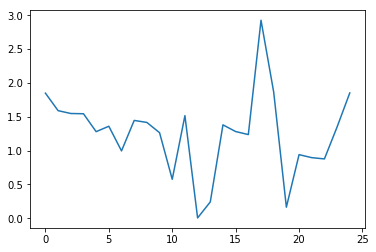

In [148]:
all_loss = train(perc)
import matplotlib.pyplot as plt
plt.plot(all_loss)

In [149]:
def evaluateRandom(perc):
    cat = random.randint(0,len(categories)-1)
    category_ = index2category[cat]
    #output_tensor = torch.LongTensor([cat])
    name_i = random.randint(0,len(categories[category_])-1)
    name = categories[category_][name_i]
    input_tensor = name2tensor(name)
    
    output = perc(input_tensor)
    
    value,index = torch.topk(output,1)
    correct = '✓' if index.item()==cat else '✗'
    print('name: ',name,', original category: ',category_,', predicted category: ',index2category[index.item()],' ',correct)



In [151]:
evaluateRandom(perc)

name:  Ngo , original category:  Vietnamese , predicted category:  Korean   ✗


In [153]:
def name2tensor_mult(name):
    n_tensor = torch.zeros(len(name),1,len(all_letters))
    for i,letter in enumerate(name):
        n_tensor[i][0][all_letters.find(letter)] = 1
    return n_tensor    

In [154]:
name2tensor_mult('John')

tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,

In [155]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(RNN,self).__init__()
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size+hidden_size,hidden_size)
        self.i2o = nn.Linear(input_size+hidden_size,hidden_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self,input,hidden):
        combined = torch.cat((input,hidden),1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output,hidden

    def initHidden(self):
        return torch.zeros(1,self.hidden_size)

In [156]:
def selectRandomexampleRNN():
    cat = random.randint(0,len(categories)-1)
    category_ = index2category[cat]
    output_tensor = torch.LongTensor([cat])
    name_i = random.randint(0,len(categories[category_])-1)
    name = categories[category_][name_i]
    input_tensor = name2tensor_mult(name)
    return input_tensor,output_tensor

In [157]:
from torch import optim
def trainRNN(rnn, iter = 5000, learning_rate = 0.01):
    all_loss = []
    optimizer = optim.SGD(rnn.parameters(), lr = learning_rate)
    criterion = nn.NLLLoss()
    while iter>0:
        hidden = rnn.initHidden()
        optimizer.zero_grad()
        input_tensor,category_tensor = selectRandomexampleRNN()
        for i in range(input_tensor.size()[0]):
            output, hidden = rnn(input_tensor[i],hidden)
        
        loss = criterion(output,category_tensor)
        if iter%200==0:
            all_loss.append(loss)
            print (loss)
        loss.backward(retain_graph=True)
        optimizer.step()
        iter-=1
    return all_loss   

tensor(4.5970)
tensor(3.6075)
tensor(2.4385)
tensor(2.5633)
tensor(1.4913)
tensor(0.9143)
tensor(3.1073)
tensor(1.5283)
tensor(2.4430)
tensor(1.9450)
tensor(1.0545)
tensor(0.9378)
tensor(0.6610)
tensor(0.9802)
tensor(0.9709)
tensor(0.8564)
tensor(0.6426)
tensor(0.5289)
tensor(1.6730)
tensor(1.4652)
tensor(1.4894)
tensor(0.8108)
tensor(1.0988)
tensor(0.9801)
tensor(2.2316)


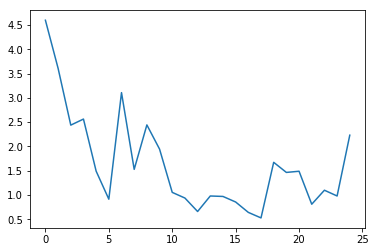

In [158]:
hidden_size = 100
input_size = len(all_letters)
output_size = len(index2category)

rnn = RNN(input_size,hidden_size,output_size)
all_loss = trainRNN(rnn)
import matplotlib.pyplot as plt
plt.plot(all_loss)

In [159]:
def evaluateRandomRNN(rnn):
    cat = random.randint(0,len(categories)-1)
    category_ = index2category[cat]
    name_i = random.randint(0,len(categories[category_])-1)
    name = categories[category_][name_i]
    input_tensor = name2tensor_mult(name)
    
    hidden = rnn.initHidden()
    for i in range(input_tensor.size()[0]):
        output, hidden = rnn(input_tensor[i],hidden)
    
    value,index = torch.topk(output,1)
    correct = '✓' if index.item()==cat else '✗'
    print('name: ',name,', original category: ',category_,', predicted category: ',index2category[index.item()],' ',correct)
    

In [161]:
evaluateRandomRNN(rnn)

name:  Ko , original category:  Korean , predicted category:  Korean   ✓
